In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends import request
import ordinal_TSA
import time
import math
%matplotlib inline

In [2]:
dfs={}
dates=pd.read_csv("data/dates_weekly.csv")

In [3]:
#Resolution of time series returned varies when requesting a month, ...
#p=request.TrendReq(google_username, google_password , hl='en-US')
#p.build_payload(["Baseball"], timeframe="2015-02-01T00 2015-02-28T00")
#print(p.interest_over_time())

In [4]:
# ... or a week
#p=request.TrendReq(google_username, google_password , hl='en-US')
#p.build_payload(["Influenza"], timeframe="2016-09-01T00 2016-09-08T00")
#print(p.interest_over_time())

In [5]:
def get_timeseries(keyword, guser, gpas):
    dfs = {}
    for i in dates[dates.columns[11:]]:
        dfs[i] = {}
        print i
        for j in dates[i]:
            if type(j) == float and math.isnan(j):
                continue
            endpoints = j.split(" ")
            key = endpoints[0] + "T00 " + endpoints[1] + "T00"
            print j
            time.sleep(10) # Might vary this sleep parameter depending on how often you get kicked off
            p = request.TrendReq(guser, gpas , hl='en-US')
            p.build_payload([keyword],timeframe=key)
            dfs[i][j] = p.interest_over_time()
            #print "Added {0} points.".format(len(dfs[i][j]))
    timeseries = pd.DataFrame()
    timeseries = dfs["2015"]["2015-01-01 2015-01-08"]

    for i in dates[dates.columns[11:]]:
        for j in dates[dates.columns[11:]][i]:
            if type(j) == float and math.isnan(j):
                continue
            if j != "2015-01-01 2015-01-08":
                df1 = timeseries
                df2 = dfs[i][j]
                ratio = float(df2[keyword].iloc[0])/float(df1[keyword].iloc[-1])
                df1[keyword] = ratio*df1[keyword]
                timeseries = pd.concat([timeseries,df2])
    m = np.max(timeseries[keyword])
    timeseries[keyword] = 100*timeseries[keyword]/m

    return timeseries

In [6]:
google_username = "<username>"
google_password = "<password>"
#PSA: You may get text messages related two-factor authentication. 
#You may also be timed out (No JSON object could be decoded')! This 
#is an unofficial Google trends SDK. Your mileage may vary.
t = get_timeseries("Full moon", google_username, google_password)

2015
2015-01-01 2015-01-08
2015-01-08 2015-01-15
2015-01-15 2015-01-22
2015-01-22 2015-01-29
2015-01-29 2015-02-05
2015-02-05 2015-02-12
2015-02-12 2015-02-19
2015-02-19 2015-02-26
2015-02-26 2015-03-05
2015-03-05 2015-03-12
2015-03-12 2015-03-19
2015-03-19 2015-03-26
2015-03-26 2015-04-02
2015-04-02 2015-04-09
2015-04-09 2015-04-16
2015-04-16 2015-04-23
2015-04-23 2015-04-30
2015-04-30 2015-05-07
2015-05-07 2015-05-14
2015-05-14 2015-05-21
2015-05-21 2015-05-28
2015-05-28 2015-06-04
2015-06-04 2015-06-11
2015-06-11 2015-06-18
2015-06-18 2015-06-25
2015-06-25 2015-07-02
2015-07-02 2015-07-09
2015-07-09 2015-07-16
2015-07-16 2015-07-23
2015-07-23 2015-07-30
2015-07-30 2015-08-06
2015-08-06 2015-08-13
2015-08-13 2015-08-20
2015-08-20 2015-08-27
2015-08-27 2015-09-03
2015-09-03 2015-09-10
2015-09-10 2015-09-17
2015-09-17 2015-09-24
2015-09-24 2015-10-01
2015-10-01 2015-10-08
2015-10-08 2015-10-15
2015-10-15 2015-10-22
2015-10-22 2015-10-29
2015-10-29 2015-11-05
2015-11-05 2015-11-12
2015-

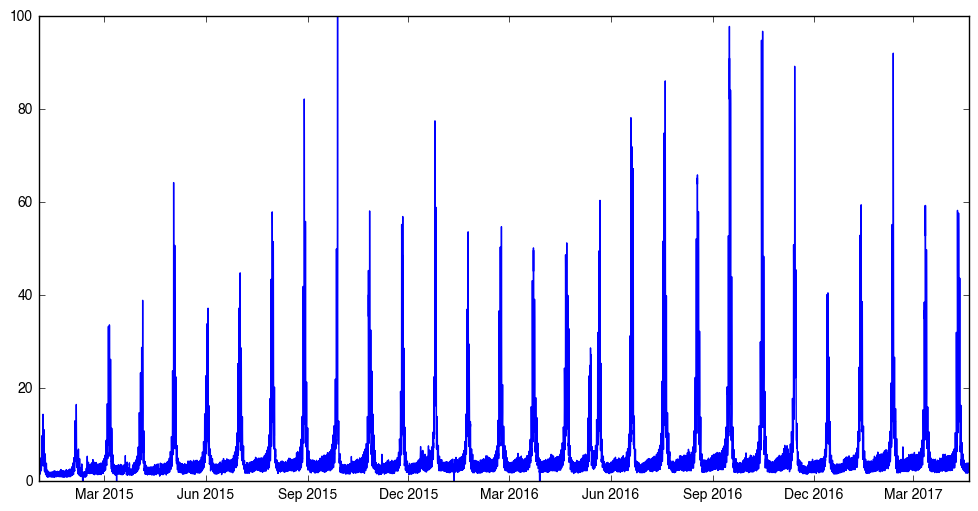

In [7]:
plt.figure(figsize=(12,6))
plt.plot(t)

In [8]:
t.to_csv("data/fullmoon_hourly.csv")
#t = pd.read_csv("data/fullmoon_hourly.csv")

In [9]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif' # ... for regular text
rcParams['font.sans-serif'] = ['Helvetica'] #, Avant Garde, Computer Modern Sans 
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['xtick.major.pad'] = '8'
rcParams['lines.solid_capstyle'] = 'butt'

Average WPE: 0.532170973819


(0, 1)

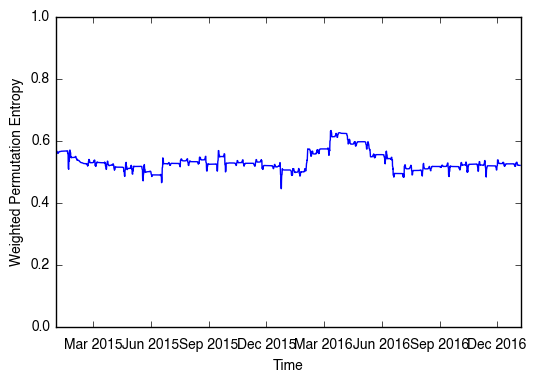

In [14]:
dim =  4 # ell
step = 24 # tau
window_length = 4*3*2*100
max_window_size = window_length
weighted = 1

res = ordinal_TSA.windowed_permutation_entropy(np.asarray(t["Full moon"]).reshape(len(t),1),window_length,dim,max_window_size=max_window_size,step=step,w=weighted)
plt.figure()
plt.plot(t.index[0:len(res)],res)
print("Average WPE: {0}".format(np.mean(res)))
plt.xlabel("Time")
plt.ylabel("Weighted Permutation Entropy")
plt.ylim(0,1)

In [11]:
#TISEAN has a hard time parsing date columns, so we just replace dates with indices
x = []
import csv
with open('data/fullmoon_hourly.csv') as csvfile:
    datareader = csv.reader(csvfile)
    for i, row in enumerate(datareader):
        if i == 0:
            x.append([row[0], row[1]])
        else:
            x.append([i, float(row[1])])

In [12]:
with open('data/fullmoon_hourly.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(x)